In [1]:
import pyspark
from pyspark.sql import SparkSession
spark  = SparkSession.builder.appName("Stock Price Predictor").getOrCreate()

In [2]:
data = spark.read.csv("all_market_data")

In [3]:
# lets do some exploratory data analysis
data.show()

+------+--------------------+--------------------+------+--------------+--------------+--------------+-----------+------------+------------+-----------+-----------+----------+--------------------+
|   _c0|                 _c1|                 _c2|   _c3|           _c4|           _c5|           _c6|        _c7|         _c8|         _c9|       _c10|       _c11|      _c12|                _c13|
+------+--------------------+--------------------+------+--------------+--------------+--------------+-----------+------------+------------+-----------+-----------+----------+--------------------+
|Symbol|                Name|              Sector| Price|Price/Earnings|Dividend Yield|Earnings/Share|52 Week Low|52 Week High|  Market Cap|     EBITDA|Price/Sales|Price/Book|         SEC Filings|
|   MMM|          3M Company|         Industrials|222.89|         24.31|     2.3328617|          7.92|     259.77|      175.49|138721055226| 9048000000|  4.3902707|     11.34|http://www.sec.go...|
|   AOS|     A.

In [4]:
# lets make header = true so that in the first row, it will display the header instead of column numbers
data = spark.read.csv("all_market_data", header = True)

In [5]:
data.show(5)

+------+-------------------+--------------------+------+--------------+--------------+--------------+-----------+------------+------------+-----------+-----------+----------+--------------------+
|Symbol|               Name|              Sector| Price|Price/Earnings|Dividend Yield|Earnings/Share|52 Week Low|52 Week High|  Market Cap|     EBITDA|Price/Sales|Price/Book|         SEC Filings|
+------+-------------------+--------------------+------+--------------+--------------+--------------+-----------+------------+------------+-----------+-----------+----------+--------------------+
|   MMM|         3M Company|         Industrials|222.89|         24.31|     2.3328617|          7.92|     259.77|      175.49|138721055226| 9048000000|  4.3902707|     11.34|http://www.sec.go...|
|   AOS|    A.O. Smith Corp|         Industrials| 60.24|         27.76|     1.1479592|           1.7|      68.39|      48.925| 10783419933|  601000000|  3.5754826|      6.35|http://www.sec.go...|
|   ABT|Abbott Labor

In [6]:
# lets view all the columns
data.printSchema()

root
 |-- Symbol: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Price/Earnings: string (nullable = true)
 |-- Dividend Yield: string (nullable = true)
 |-- Earnings/Share: string (nullable = true)
 |-- 52 Week Low: string (nullable = true)
 |-- 52 Week High: string (nullable = true)
 |-- Market Cap: string (nullable = true)
 |-- EBITDA: string (nullable = true)
 |-- Price/Sales: string (nullable = true)
 |-- Price/Book: string (nullable = true)
 |-- SEC Filings: string (nullable = true)



In [7]:
# Selecting a particular row
data_MSFT = data.filter(data.Symbol == "MSFT")

In [8]:
data_MSFT.show()

+------+---------------+--------------------+-----+--------------+--------------+--------------+-----------+------------+------------+-----------+-----------+----------+--------------------+
|Symbol|           Name|              Sector|Price|Price/Earnings|Dividend Yield|Earnings/Share|52 Week Low|52 Week High|  Market Cap|     EBITDA|Price/Sales|Price/Book|         SEC Filings|
+------+---------------+--------------------+-----+--------------+--------------+--------------+-----------+------------+------------+-----------+-----------+----------+--------------------+
|  MSFT|Microsoft Corp.|Information Techn...|85.01|         25.76|     1.8747908|          2.97|      96.07|       63.22|689978437468|41079000000|  7.1130967|      9.49|http://www.sec.go...|
+------+---------------+--------------------+-----+--------------+--------------+--------------+-----------+------------+------------+-----------+-----------+----------+--------------------+



In [9]:
# select operation to select only particular columns
data3 =data.select(["Symbol", "Price", "Price/Earnings", "52 Week Low", "52 Week High"])

In [10]:
data3.show(3)

+------+------+--------------+-----------+------------+
|Symbol| Price|Price/Earnings|52 Week Low|52 Week High|
+------+------+--------------+-----------+------------+
|   MMM|222.89|         24.31|     259.77|      175.49|
|   AOS| 60.24|         27.76|      68.39|      48.925|
|   ABT| 56.27|         22.51|       64.6|       42.28|
+------+------+--------------+-----------+------------+
only showing top 3 rows



In [11]:
stock = spark.read.csv('stock_data', header=True)

In [12]:
stock.show(5)

+------+----------+----------+-------+--------+--------+--------+
|Ticker|      Date|Close/Last| Volume|    Open|    High|     Low|
+------+----------+----------+-------+--------+--------+--------+
| BRK-B|05/31/2023|  $321.08 |6175417|$321.12 |$322.41 |$319.39 |
| BRK-B|05/30/2023|  $322.19 |3232461|$321.86 |$322.47 |$319.00 |
| BRK-B|05/26/2023|  $320.60 |3229873|$320.44 |$322.63 |$319.67 |
| BRK-B|05/25/2023|  $319.02 |4251935|$320.56 |$320.56 |$317.71 |
| BRK-B|05/24/2023|  $320.20 |3075393|$322.71 |$323.00 |$319.56 |
+------+----------+----------+-------+--------+--------+--------+
only showing top 5 rows



In [13]:
MSFT = stock.filter(stock.Ticker == "MSFT")

In [14]:
MSFT.show(5)

+------+----------+----------+--------+--------+--------+--------+
|Ticker|      Date|Close/Last|  Volume|    Open|    High|     Low|
+------+----------+----------+--------+--------+--------+--------+
|  MSFT|05/31/2023|  $328.39 |45950550|$332.29 |$335.94 |$327.33 |
|  MSFT|05/30/2023|  $331.21 |29503070|$335.23 |$335.74 |$330.52 |
|  MSFT|05/26/2023|  $332.89 |36630630|$324.02 |$333.40 |$323.88 |
|  MSFT|05/25/2023|  $325.92 |43301740|$323.24 |$326.90 |$320.00 |
|  MSFT|05/24/2023|  $313.85 |23384890|$314.73 |$316.50 |$312.61 |
+------+----------+----------+--------+--------+--------+--------+
only showing top 5 rows



In [15]:
stock.toPandas()

,Ticker,Date,Close/Last,Volume,Open,High,Low
0,BRK-B,05/31/2023,$321.08,6175417,$321.12,$322.41,$319.39
1,BRK-B,05/30/2023,$322.19,3232461,$321.86,$322.47,$319.00
2,BRK-B,05/26/2023,$320.60,3229873,$320.44,$322.63,$319.67
3,BRK-B,05/25/2023,$319.02,4251935,$320.56,$320.56,$317.71
4,BRK-B,05/24/2023,$320.20,3075393,$322.71,$323.00,$319.56
...,...,...,...,...,...,...,...
15103,QQQ,06/06/2018,175.86,24972980,175.025,175.89,174.14
15104,QQQ,06/05/2018,174.84,24739120,174.69,175.13,174.065
15105,QQQ,06/04/2018,174.3,19984280,173.16,174.34,173.07
15106,QQQ,06/01/2018,172.74,45446770,170.88,172.84,170.87


In [16]:
stock

DataFrame[Ticker: string, Date: string, Close/Last: string, Volume: string, Open: string, High: string, Low: string]

In [17]:
stock.show(5)

+------+----------+----------+-------+--------+--------+--------+
|Ticker|      Date|Close/Last| Volume|    Open|    High|     Low|
+------+----------+----------+-------+--------+--------+--------+
| BRK-B|05/31/2023|  $321.08 |6175417|$321.12 |$322.41 |$319.39 |
| BRK-B|05/30/2023|  $322.19 |3232461|$321.86 |$322.47 |$319.00 |
| BRK-B|05/26/2023|  $320.60 |3229873|$320.44 |$322.63 |$319.67 |
| BRK-B|05/25/2023|  $319.02 |4251935|$320.56 |$320.56 |$317.71 |
| BRK-B|05/24/2023|  $320.20 |3075393|$322.71 |$323.00 |$319.56 |
+------+----------+----------+-------+--------+--------+--------+
only showing top 5 rows



In [30]:
#feature selection


In [31]:
data = stock.select("Close/Last", "Volume", "Open", "High", "Low")

In [32]:
data.show(5)

+----------+-------+--------+--------+--------+
|Close/Last| Volume|    Open|    High|     Low|
+----------+-------+--------+--------+--------+
|  $321.08 |6175417|$321.12 |$322.41 |$319.39 |
|  $322.19 |3232461|$321.86 |$322.47 |$319.00 |
|  $320.60 |3229873|$320.44 |$322.63 |$319.67 |
|  $319.02 |4251935|$320.56 |$320.56 |$317.71 |
|  $320.20 |3075393|$322.71 |$323.00 |$319.56 |
+----------+-------+--------+--------+--------+
only showing top 5 rows



# Let's train our ML models




In [22]:
# so now we can start training our ML models

In [33]:
from pyspark.sql.functions import col, expr
from pyspark.sql.types import DoubleType


# List of column names to convert
columns_to_convert = ["Close/Last", "Volume", "Open", "High", "Low"]

# Loop over the columns and apply the type conversion
for column in columns_to_convert:
    data = data.withColumn(column, col(column).cast(DoubleType()))
 

from pyspark.ml.feature import VectorAssembler, StandardScaler
# pyspark requires the x features to be a vector in a single column
features_to_scale = ['Close/Last', 'Volume', 'Open', 'High', 'Low']
# first let us drop any na values
data_cleaned = data.na.drop()

# now lets assemble these features into a single vector column
assembler = VectorAssembler(inputCols = features_to_scale, outputCol = "features")
data_assembled = assembler.transform(data_cleaned)

# now we can scale these assembled features
scaler = StandardScaler(inputCol = "features", outputCol = "scaledFeatures", withStd = True, withMean = False)
scaler_model = scaler.fit(data_assembled)
data_scaled = scaler_model.transform(data_assembled)

# Now data_scaled contains the original data and a column "scaledFeatures" with scaled data

# Gradient Boosted Tree

In [34]:
data_scaled.show(5)

+----------+----------+------+------+--------+--------------------+--------------------+
|Close/Last|    Volume|  Open|  High|     Low|            features|      scaledFeatures|
+----------+----------+------+------+--------+--------------------+--------------------+
|    417.85|1.108118E8|418.28|419.22|  416.22|[417.85,1.108118E...|[5.13017691492424...|
|    420.18|7.221596E7|422.03|422.58| 418.735|[420.18,7.221596E...|[5.15878362118671...|
|    420.02|9.382998E7|415.33|420.77|  415.25|[420.02,9.382998E...|[5.15681921217298...|
|    414.65|9.096161E7|414.74|416.16|412.4101|[414.65,9.096161E...|[5.09088873464960...|
|    411.09|8.921368E7|412.42|412.82|409.8795|[411.09,8.921368E...|[5.04718063409407...|
+----------+----------+------+------+--------+--------------------+--------------------+
only showing top 5 rows



In [37]:
# so x_scaled contains the original features along with the scaled features
# in order for us to train our model, our dataset can only contain two columns, one is the y 
# and the other is the vector of features column
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator 
import matplotlib.pyplot as plt

Exception ignored in: <function JavaWrapper.__del__ at 0x00000228686F8550>
Traceback (most recent call last):
  File "C:\Users\durva\OneDrive\NTU courses\SEM 2\Anaconda\lib\site-packages\pyspark\ml\wrapper.py", line 53, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'StandardScaler' object has no attribute '_java_obj'


Root Mean Squared Error (RMSE) on test data = 60.031798174044624
MAE: 56.93290089756483
R2: -9.330704297086424


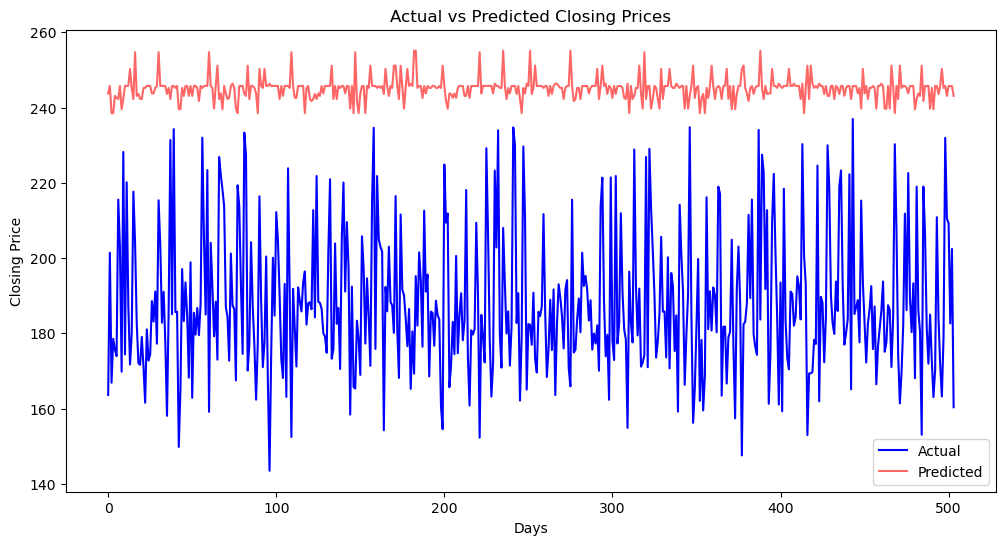

In [39]:
data_renamed = data_scaled.withColumnRenamed("Close/Last", "Price").select("scaledFeatures", "Price")

# Split the data into a training set and a test set. 
# Here, we're using a time-based split - 80% for training and 20% for testing
train_count = int(data_renamed.count() * 0.8)
train_data = data_renamed.limit(train_count)
test_data = data_renamed.subtract(train_data)

# Model Training
# Gradient Boosted Trees are chosen due to their robustness and ability to model non-linear patterns
gbt = GBTRegressor(labelCol="Price", featuresCol="scaledFeatures", maxIter=50)
model = gbt.fit(train_data)
predictions = model.transform(test_data)

# Model Evaluation
# Compute the RMSE (Root Mean Squared Error) for the predictions
evaluator_rmse = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName="rmse")
rmse = evaluator_rmse.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data =", rmse)

# Compute other metrics: Mean Absolute Error (MAE) and R-squared (R2)
for metric in ["mae", "r2"]:
    evaluator = RegressionEvaluator(labelCol="Price", predictionCol="prediction", metricName=metric)
    value = evaluator.evaluate(predictions)
    print(f"{metric.upper()}: {value}")

# Visualization
# Plot the actual vs predicted values for adjusted closing prices
preds = predictions.select("Price", "prediction").toPandas()
plt.figure(figsize=(12, 6))
plt.plot(preds["Price"], label='Actual', color='blue')
plt.plot(preds["prediction"], label='Predicted', color='red', alpha=0.6)
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Terminate the Spark session
#spark.stop()